# Анализ выпущенных игр

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Загружаем датасет
data = pd.read_csv('metacritic_18.07.2021_csv.csv')

In [4]:
data

,titles,platforms,metascore,userscore,genre,date
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,"July 15, 2021"
1,Sniper Elite VR,PC,67.0,7.1,action,"July 8, 2021"
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,"July 8, 2021"
3,Boomerang X,PC,81.0,6.6,action,"July 8, 2021"
4,Boomerang X,Switch,78.0,6.3,action,"July 8, 2021"
...,...,...,...,...,...,...
30772,WCW Backstage Assault,Nintendo 64,NaN,6.0,wrestling,"December 12, 2000"
30773,WWF SmackDown! 2: Know Your Role,PlayStation,90.0,8.4,wrestling,"November 21, 2000"
30774,WWF No Mercy,Nintendo 64,89.0,8.5,wrestling,"November 17, 2000"
30775,ECW Anarchy Rulz,PlayStation,NaN,6.4,wrestling,"August 18, 2000"


# Очистка данных

### 1. Проверяем соответствие типов данных

In [5]:
data.dtypes

titles        object
platforms     object
metascore    float64
userscore     object
genre         object
date          object
dtype: object

Столбец date и userscore имеет неправильный формат данных

In [6]:
# Переводим в релевантный формат date
data['date'] = pd.to_datetime(data['date'])

In [7]:
data

,titles,platforms,metascore,userscore,genre,date
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,2021-07-15
1,Sniper Elite VR,PC,67.0,7.1,action,2021-07-08
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,2021-07-08
3,Boomerang X,PC,81.0,6.6,action,2021-07-08
4,Boomerang X,Switch,78.0,6.3,action,2021-07-08
...,...,...,...,...,...,...
30772,WCW Backstage Assault,Nintendo 64,NaN,6.0,wrestling,2000-12-12
30773,WWF SmackDown! 2: Know Your Role,PlayStation,90.0,8.4,wrestling,2000-11-21
30774,WWF No Mercy,Nintendo 64,89.0,8.5,wrestling,2000-11-17
30775,ECW Anarchy Rulz,PlayStation,NaN,6.4,wrestling,2000-08-18


Столбец userscore переведём в соответствующий формат и удалим некорректные значения чуть позже, чтобы не искажать частотное распределение некоторых столбцов 

### 2. Поиск пропущенных значений

In [7]:
# Ищем пропущенные значения
print(data.isnull().sum())

titles          0
platforms       0
metascore    2291
userscore    5695
genre           0
date            0
dtype: int64


Около 20% пропущенных значений в столбце userscore и примерно 8% в столбце metascore

In [18]:
# Взглянем на уникальные значения столбца metascore
data.metascore.unique()

array([88., 67., 75., 81., 78., 51., 55., 60., 56., 62., 64., 79., 73.,
       76., 84., 85., 82., 66., 87., 74., 71., 68., 72., 61., 83., 80.,
       65., 70., 77., 69., 86., 59., 63., 58., nan, 54., 89., 52., 90.,
       91., 92., 53., 93., 50., 57., 94., 97., 95., 96., 98.])

In [19]:
# Тоже самое сделаем со столбцом userscore
data.userscore.unique()

array(['tbd', '7.1', '6.6', '6.3', nan, '6.4', '7.0', '6.8', '7.3', '6.2',
       '6.0', '6.7', '7.2', '5.5', '6.9', '6.1', '5.4', '5.7', '5.8',
       '5.2', '5.1', '7.4', '5.3', '5.9', '6.5', '5.0', '5.6', '8.6',
       '8.3', '8.4', '8.2', '8.0', '8.1', '7.8', '7.7', '8.8', '7.6',
       '8.5', '7.9', '7.5', '9.1', '9.6', '9.0', '8.7', '8.9', '9.7',
       '9.2', '9.3', '9.8', '9.4'], dtype=object)

Заметим, что кроме nan, присутствует некое значение tbd

Заменим пропущенные значения столбца metascore на среднее, но прежде взглянем на описательную статистику

In [23]:
data.describe()

,metascore
count,28481.000000
mean,72.278466
std,9.923755
min,50.000000
25%,65.000000
50%,73.000000
75%,80.000000
max,98.000000


Среднее значение почти совпадает с медианой, поэтому будет корректно заменить пропущенные значения средним

### 3. Поиск дубликатов

In [8]:
# Проверим датасет на наличие дубликатов
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (5, 6)


In [9]:
# Удалим повторяющиеся строки
data = data.drop_duplicates()
data.head(5)

,titles,platforms,metascore,userscore,genre,date
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,2021-07-15
1,Sniper Elite VR,PC,67.0,7.1,action,2021-07-08
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,2021-07-08
3,Boomerang X,PC,81.0,6.6,action,2021-07-08
4,Boomerang X,Switch,78.0,6.3,action,2021-07-08


In [10]:
# Индексируем строки заново
data.reset_index(drop=True)

,titles,platforms,metascore,userscore,genre,date
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,2021-07-15
1,Sniper Elite VR,PC,67.0,7.1,action,2021-07-08
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,2021-07-08
3,Boomerang X,PC,81.0,6.6,action,2021-07-08
4,Boomerang X,Switch,78.0,6.3,action,2021-07-08
...,...,...,...,...,...,...
30767,WCW Backstage Assault,Nintendo 64,NaN,6.0,wrestling,2000-12-12
30768,WWF SmackDown! 2: Know Your Role,PlayStation,90.0,8.4,wrestling,2000-11-21
30769,WWF No Mercy,Nintendo 64,89.0,8.5,wrestling,2000-11-17
30770,ECW Anarchy Rulz,PlayStation,NaN,6.4,wrestling,2000-08-18


# Исследовательский анализ данных

Перед нами датасет с данными о релизах игр, начиная с 1994 года и заканчивая 2021 годом

Датасет содержит информацию о:

1. Название игры
2. Платформа, на которой она была выпущена
3. Оценка с сайта Metascore
4. Оценка пользователей
5. Жанр игры
6. Дата выпуска

По ходу анализа мы будем задавать вопросы к имеющимся данным, чтобы получить как можно больше полезной информации

Начнем с простого вопроса - "Есть ли тенденция в количестве выпущенных игр в зависимости от года?"

In [11]:
# Создадим столбец с годами релизов игр
data['Year'] = pd.DatetimeIndex(data['date']).year  

In [12]:
# Проверим наличие столбца
data

,titles,platforms,metascore,userscore,genre,date,Year
0,Streets of Rage 4: Mr. X Nightmare,PC,88.0,tbd,action,2021-07-15,2021
1,Sniper Elite VR,PC,67.0,7.1,action,2021-07-08,2021
2,Sniper Elite VR,PlayStation 4,75.0,tbd,action,2021-07-08,2021
3,Boomerang X,PC,81.0,6.6,action,2021-07-08,2021
4,Boomerang X,Switch,78.0,6.3,action,2021-07-08,2021
...,...,...,...,...,...,...,...
30772,WCW Backstage Assault,Nintendo 64,NaN,6.0,wrestling,2000-12-12,2000
30773,WWF SmackDown! 2: Know Your Role,PlayStation,90.0,8.4,wrestling,2000-11-21,2000
30774,WWF No Mercy,Nintendo 64,89.0,8.5,wrestling,2000-11-17,2000
30775,ECW Anarchy Rulz,PlayStation,NaN,6.4,wrestling,2000-08-18,2000


[Text(0.5, 0, 'Год выпуска'), Text(0, 0.5, 'Количество игр')]

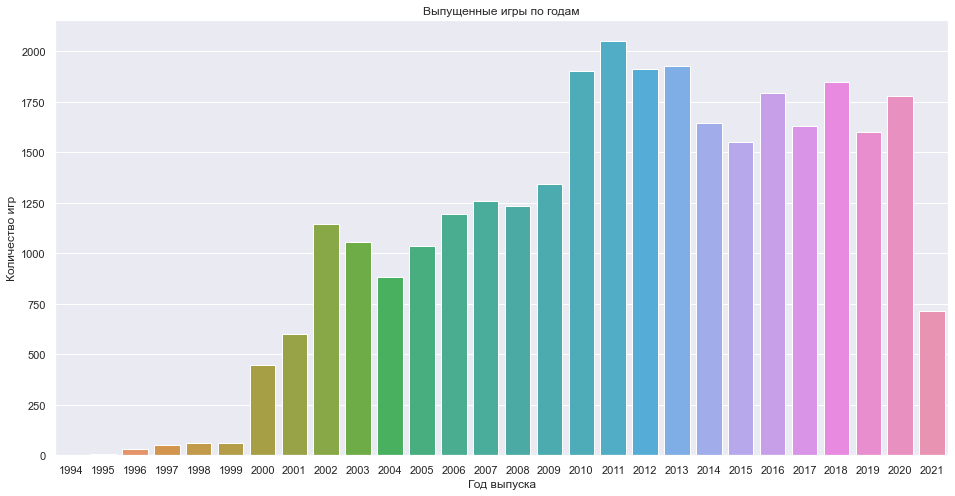

In [13]:
# Строим гистограмму
plt.figure(figsize=(16,8))
plt.title("Выпущенные игры по годам")
sns.countplot(data = data, x = 'Year').set(
    xlabel='Год выпуска', 
    ylabel='Количество игр')

Мы можем увидеть тендецию в увеличении количества выпущенных игр, начиная с 2000-ого года вплоть до 2011-ого года. Количество релизов увеличилось с чытырехсот до двух с небольшим тысяч, то есть примерно в пять раз.

После 2011-ого года тенденция волнообразная, но тем не менее ниже 1500 игр в год не выпускается (исключая 2021 год, так как в датасете данные не за весь год, так как он ещё не закончился и неизвестно сколько ещё будет релизов игр).

Самыми пиковыми годами по выпуску игр были 2010-2013 года (возможно это связано с тем, что появились производительные компьютеры и смартфоны, и поэтому gamedev начал активно развиваться).

Далее мы ответим на следующий вопрос: Какие месяца самые популярные для выпуска игр?

In [14]:
# Создадим столбец с месяцами релизов игр
data['Month'] = pd.DatetimeIndex(data['date']).month  

In [15]:
#data.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

[Text(0.5, 0, 'Месяц релиза'), Text(0, 0.5, 'Количество игр')]

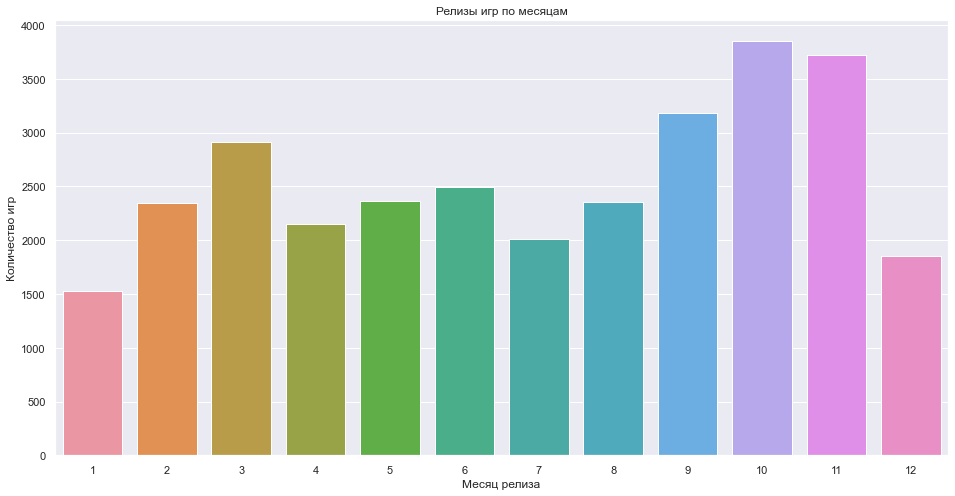

In [16]:
# Строим гистограмму
plt.figure(figsize=(16,8))
plt.title('Релизы игр по месяцам')
sns.countplot(data = data, x = 'Month').set(
        xlabel = 'Месяц релиза',
        ylabel = 'Количество игр')

На гистограмме отчётливо видно, что наибольшее число релизов приходится на осень (больше трёх тысяч релизов в месяц, начиная с 1994 года), максимум - в октябре (почти 4000).

Самыми непопулярным месяцем для выпуска игр являются январь (1500 релизов с 1994 года). Среди остальных месяцев стоит отметить март - он четвертый по популярности месяц выпуска игр (почти 3000).

Как и в кино, в играх есть жанры. И встает вопрос - есть ли среди них какой-либо самый популярный?

[Text(0.5, 0, 'Жанр игры'), Text(0, 0.5, 'Количество игр')]

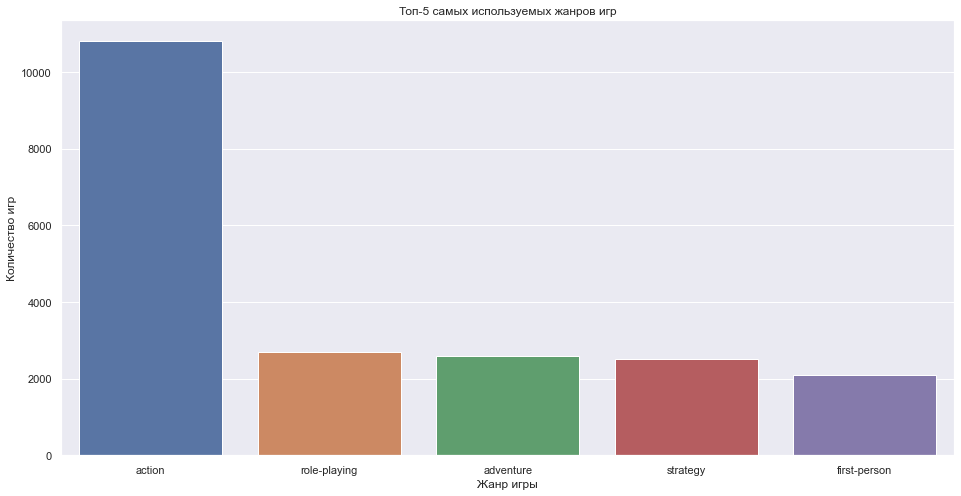

In [17]:
# Топ-5 самых используемых жанров игр
plt.figure(figsize=(16,8))
plt.title('Топ-5 самых используемых жанров игр')
sns.countplot(data=data, x='genre', order = data['genre'].value_counts().iloc[:5].index).set(
            xlabel = 'Жанр игры',
            ylabel = 'Количество игр')

С большим отрывом лидирует жанр - "Action" (больше 10000 выпущенных игр этого жанра).

Следующие за ним жанры примерны равны по популярности ("Role-playing", "Adventure", "Strategy", "First-person")

Представленные в датасете игры были разработаны на разные платформы. Тут также, как и с жанрами интересно узнать - "Если какие-нибудь платформы, на которые больше всего выпускают игры?"

[Text(0.5, 0, 'Платформы'), Text(0, 0.5, 'Количество игр')]

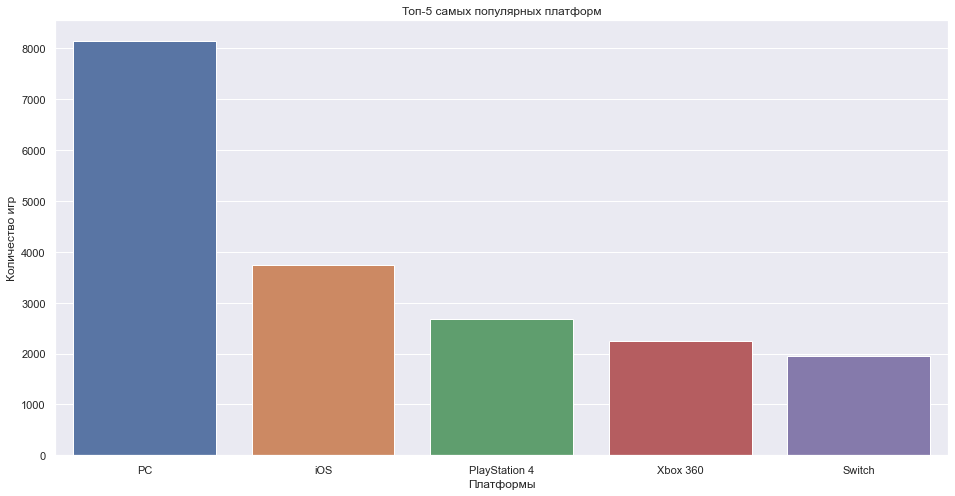

In [18]:
# Топ-5 самых популярных платформ
plt.figure(figsize=(16,8))
plt.title('Топ-5 самых популярных платформ')
sns.countplot(data=data, x='platforms', order=data['platforms'].value_counts().iloc[:5].index).set(
            xlabel = 'Платформы',
            ylabel = 'Количество игр')

Наибольшее число выпущенных игр приходится на персональный компьютер (PC, больше 8000 тысяч релизов). 

За ним следует IOS - мобильная операционная система компании Apple (больше 3000 выпущенных игр на эту платформу).

С третьего по пятое место занимают игровые приставки (PlayStation 4, Xbox 360, Switch - от 2000 до 2500 выпущенных игр).

### Сравнение средних оценок

#### Жанры

В этом блоке мы попытаемся узнать - Есть ли различия в средних оценках Metascore в зависимости от жанра или платформы?

In [19]:
# Заменим пропущенные значения на среднее значение
data['metascore'].fillna((data['metascore'].mean()), inplace=True)

[Text(0.5, 0, 'Оценки с сайта Metascore'), Text(0, 0.5, 'Жанр игры')]

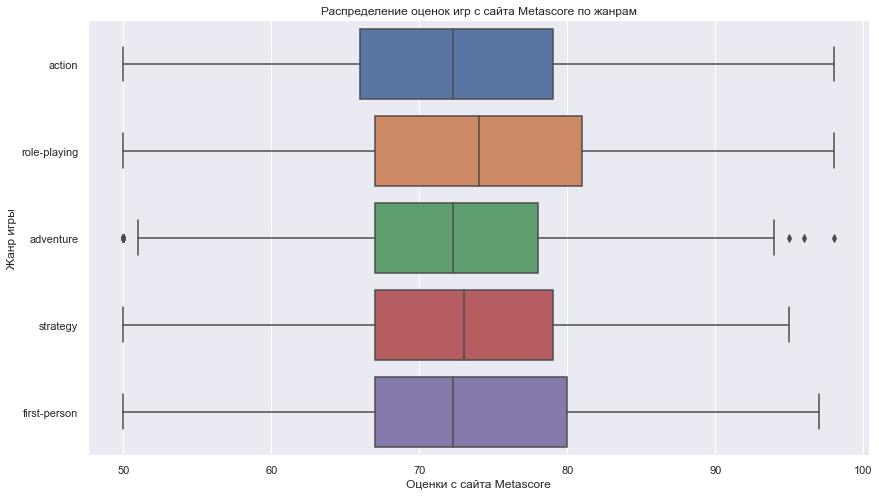

In [20]:
# Оценки игр с сайта Metascore по жанрам
plt.figure(figsize=(14,8))
plt.title('Распределение оценок игр с сайта Metascore по жанрам')
sns.boxplot(data=data, x='metascore', y='genre', orient='h', order = data['genre'].value_counts().iloc[:5].index).set(
            xlabel = 'Оценки с сайта Metascore',
            ylabel = 'Жанр игры')

In [22]:
# Используем параметрический критерий сравнения средних - ANOVA

from scipy import stats
from scipy.stats import f_oneway

stats.f_oneway(data['metascore'][data['genre'] == 'action'],
               data['metascore'][data['genre'] == 'role-playing'],
               data['metascore'][data['genre'] == 'adventure'],
                data['metascore'][data['genre'] == 'strategy'],
                data['metascore'][data['genre'] == 'first-person'])


F_onewayResult(statistic=13.914601320891244, pvalue=2.4483739195421186e-11)

Полученный показатель p-value не дает нам права говорить, что есть статистически значимые различия в средних оценках в зависимости от жанра игры

#### Платформы

[Text(0.5, 0, 'Оценки с сайта Metascore'), Text(0, 0.5, 'Платформа')]

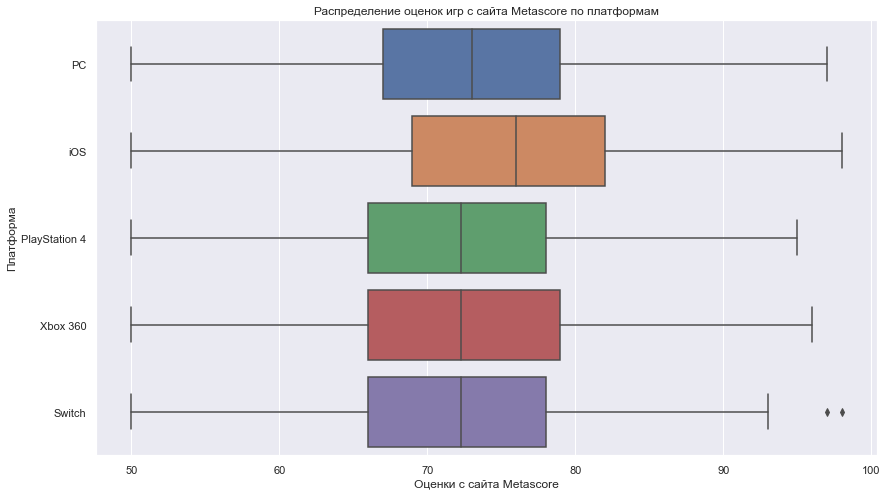

In [23]:
# Оценки игр с сайта Metascore по платформам
plt.figure(figsize=(14,8))
plt.title('Распределение оценок игр с сайта Metascore по платформам')
sns.boxplot(data = data, x = 'metascore', y = 'platforms', order = data['platforms'].value_counts().iloc[:5].index).set(
            xlabel = 'Оценки с сайта Metascore',
            ylabel = 'Платформа')

In [25]:
stats.f_oneway(data['metascore'][data['platforms'] == 'PC'],
               data['metascore'][data['platforms'] == 'iOS'],
               data['metascore'][data['platforms'] == 'PlayStation 4'],
                data['metascore'][data['platforms'] == 'Xbox 360'],
                data['metascore'][data['platforms'] == 'Switch'])

F_onewayResult(statistic=79.04838488971785, pvalue=1.2752422436998613e-66)

В случае же с платформами есть статистически значимые различия в средних оценках, поэтому мы можем сказать, что игры, которые были выпущены на платформе iOS в среднем имеют более высокие оценки

# Выводы

- Самое большое количество релизов игр пришлось на 2010-2013 года

- Начиная с 2000-ого года и вплоть до 2011-ого количество выпущенных игр увеличилось примерно в пять раз

- Чаще всего игры выпускают осенью, пик приходится на октябрь

- Январь - самый непопулярный месяц для выпуска игр

- Самый популярный жанр, выпускаемых игр - Экшн

- Большинство игр разрабатывается на платформу персонального компьютера

- В среднем более высокую оценку на сайте Metascore получают игры платформы iOS